# Least Squares  Polynomial Fitting (0.9 points)

## Introduction

As discussed during Week 2, one can use linear regression to fit a nonlinear function to data by employing a nonlinear embedding function $\phi: \Re^D \rightarrow \Re^K$. One can then express a nonlinear function  in terms of an inner product 
as follows:
$$f(\mathbf{x}) = \langle \mathbf{w}, \phi(\mathbf{x})\rangle $$

In this assignment we will consider the case of an embedding function that takes a point $x\in R$ to a $K$-dimensional space using the following expression:

$$\phi_K(x) = \left[\begin{array}{c}1 \\ x \\ x^2 \\ \vdots\\ x^K \end{array}\right]$$

We will be treating $K$ as a hyper-parameter, i.e. we will not try to estimate $K$, but will rather explore the effect of changing its values. 

Using this embedding function allows us to express a $K$-th order polynomial in terms of an inner product:

$$ f_K(x) =  \langle \mathbf{w}^T_K \phi_K(x)\rangle = w_0 + w_1 x + w_2 x^2 + \ldots + x_K x^K $$


If the quality of the approximation on a set of points is measured in terms of the quadratic loss:
\begin{equation}
E(f,\mathcal{S}) = \sum_i (y_i - f_K(x_i))^2
\end{equation}
we can then find the optimal parameters $\mathbf{w}_K$ of $f_K$ using the least squares formula derived in class.


## Assignments

The function $\verb+pickle.load+$ loads the data set from the file $\verb+data_pol_fit.pkl+$, we then display the training and test sets. 

This notably provides you with a training set of input-output pairs $\mathcal{S} = \{(x_i,y_i)\}$ where $x_i \in \Re, y_i \in \Re, \quad i = 1\ldots 20$. 
Your task is to estimate a function $f:\Re\rightarrow \Re$ that can approximate the underlying input-output mapping well. 


1. (0.4) Find the optimal parameters $\mathbf{w}_0,\mathbf{w}_1,\ldots,\mathbf{w}_{10}$ if $f_K(x)$ is a polynomial of degree $0$ up to $10$, respectively. 
2. (0.1) Plot the estimated functions within the interval $[-1,1]$. 
3. (0.4) Plot  the value of the loss as a function of  the polynomial's order
 (a) on the training set and the (b) test set. Plot the two functions together. What do you observe? Do you have a possible interpretation of this result?

## Import test and training data from 1Ddata.mat

In [1]:
# Import all necessary module. If you get an error when executing
# this cell, then you are probably missing a module

import os 
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
#x_train = spio.loadmat('1Ddata.mat', squeeze_me=True)['x_train']
#x_test = spio.loadmat('1Ddata.mat', squeeze_me=True)['x_test']
#y_train = spio.loadmat('1Ddata.mat', squeeze_me=True)['y_train']
#y_test = spio.loadmat('1Ddata.mat', squeeze_me=True)['y_test']

with open('data_pol_fit.pkl', 'rb') as handle:
        data = pickle.load(handle)

x_train = data['x_train'].T
x_test = data['x_test'].T
y_train = data['y_train'].T
y_test = data['y_test'].T

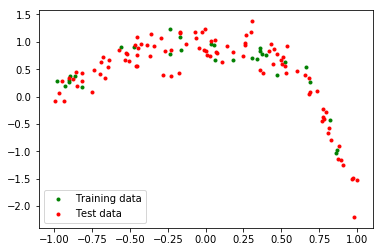

In [3]:
plt.figure()
plt.scatter(x_train,y_train, c='g', marker='.', label="Training data")
plt.scatter(x_test,y_test, c='r', marker='.', label="Test data")
plt.legend()
plt.show()

## Define function poly 
Poly should take a vector value x and a K+1 dimensional vector w as arguments and return the value of the K-th order polynomial: 
$$ f_K(x) =  \langle \mathbf{w}^T_K \phi_K(x)\rangle = w_0 + w_1 x + w_2 x^2 + \ldots + x_K x^K $$

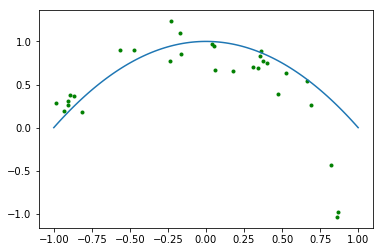

In [4]:
def poly(x, weight):    
    return np.polyval(weight[::-1], x)
    
# test if the function is correct
w=[1,0,-1]
x = np.linspace(-1.0,1.0, num=100, endpoint=True)
y = poly(x, w)
plt.figure()
plt.plot(x,y)
plt.scatter(x_train,y_train, c='g', marker='.', label="Train data")
plt.show()

## Define embedding function

Now we need to define an embedding function that takes a point (or a vector of points) $x\in R$ to a $K$-dimensional space using the following expression:

$$\phi_K(x) = \left[\begin{array}{c}1 & x & x^2 & \dots & x^K \end{array}\right]$$

K should be an argument to the function. Keep in mind that we should also be able to apply the function to vectors. That means, if we have N data samples $x_1,x_2,\dots,x_N$ and feed vector $\vec{x}=[x_1,x_2,\dots,x_N]^T$ to the function then the output should be the following array: 


$$\phi_K(\vec{x}) = \left[\begin{array}{cccc}
1 & x_1 & x_1^2 & \dots & x_1^K \\
1 & x_2 & x_2^2 & \dots & x_2^K \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_N & x_N^2 & \dots & x_N^K  
\end{array}\right]$$



 


In [5]:
# x should be a scalar or a vector of dimensions [n, 1]
def embedding_func(x,K):
    F = np.array([[float(x_scalar)**i for i in range(0, K + 1)] for x_scalar in x])
    return F

## if the function is correct, following should print [1 2 4 8 16; 1 3 9 27 81]
x = np.array([2, 3])
print(embedding_func(x,4))

[[  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]]


# Define function that fits K-th order polynomial and returns parameter w 

Input arguments for the function are [Nx1] vector y and [Nx1] vector x. Hint: In python 3.6 you can write A@B to do matrix multiplication instead of np.matmul(A,B).

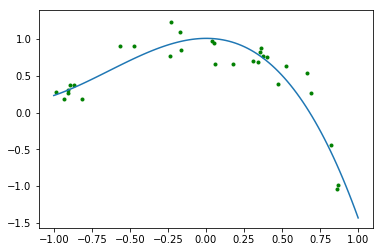

In [6]:
from numpy.linalg import inv

def estimate_w(y,X,K):
    X_embedding = embedding_func(X, K)
    w = inv((np.transpose(X_embedding) @ X_embedding)) @ np.transpose(X_embedding) @ y
    return w
    
    
w = estimate_w(y_train,x_train,3)
x = np.linspace(-1.0,1.0, num=100, endpoint=True)
y = poly(x, w)
plt.figure()
plt.plot(x,y)
plt.scatter(x_train,y_train, c='g', marker='.', label="Train data")
plt.show()

In [7]:
w

array([[ 1.00984503],
       [ 0.00721856],
       [-1.61041748],
       [-0.84011212]])

# Fit 0-th to 10-th order polynomials to training data and plot resulting functions 




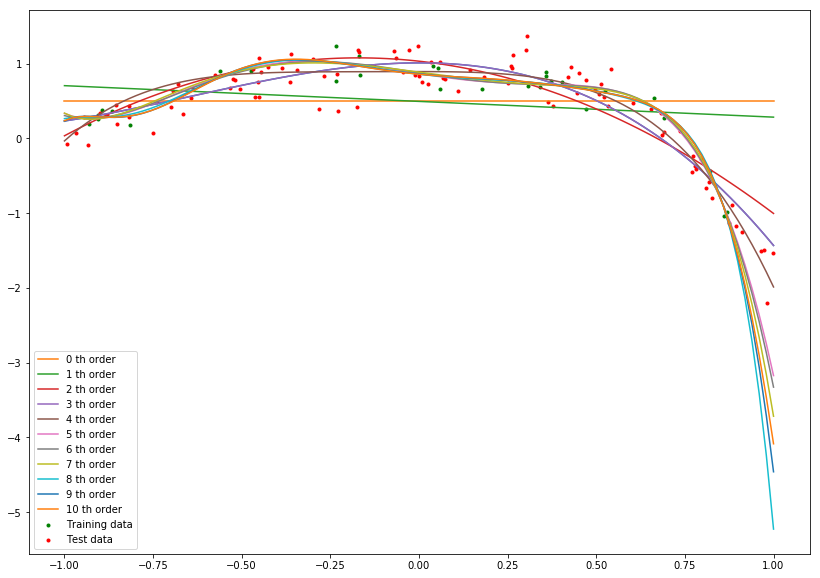

In [8]:
max_poly = 10

weights_store = list()

plt.figure(figsize=(14,10))
plt.plot(x,y)
x = np.linspace(-1.0,1.0, num=100, endpoint=True)
plt.scatter(x_train,y_train, c='g', marker='.', label="Training data")
plt.scatter(x_test,y_test, c='r', marker='.', label="Test data")

for poly_degree in range(max_poly+1):
    w = estimate_w(y_train,x_train,poly_degree)
    y = poly(x, w)
    plt.plot(x,y,label='%d th order'%(poly_degree))
    
plt.legend(loc=3)
plt.show()

# Training and Testing Error

Calculate the training and the testing error given: 
\begin{equation}
E(f,\mathcal{S}) = \sum_i (y_i - f_K(x_i))^2
\end{equation}

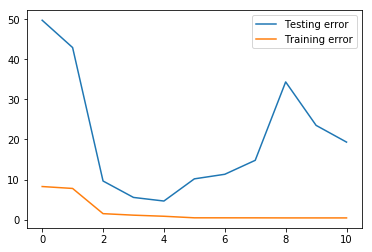

In [9]:
error_train = np.zeros(shape=(max_poly+1))
error_test  = np.zeros(shape=(max_poly+1))

for poly_degree in range(max_poly+1):
    w = estimate_w(y_train,x_train,poly_degree)
    y_estimate_train = poly(x_train, w)
    y_estimate_test = poly(x_test, w)
    error_train[poly_degree] = sum((y_train - y_estimate_train)**2)
    error_test[poly_degree] = sum((y_test - y_estimate_test)**2)
    
plt.figure()
plt.plot(error_test, label="Testing error")
plt.plot(error_train, label="Training error")
plt.legend()
plt.show()

### Interpretation

While the train error keeps decreasing as we increase the polynomial order (though the decrease gets smaller and smaller, almost plateauing by degree 6), the test error decreases only until degree 4, after which it starts increasing again. This is due to the fact that higher order polynomials manage to express more complex functions and, hence, fit the training data more accurately. At the same time, this leads to overfitting on training data, which leads to a lack of generalization. This means that despite the fact that our training error would be extremely low, applying the model on newly seen data will most likely give poor performance.

# 2. Linear versus logistic regression (0.7 points)}

The  file {week_1} contains code to compare the robustness of linear and logistic regression.
Linear regression has already been implemented for you. Please go through the relevant part of the code, and the relevant comments, before advancing to the remainder. 



As discussed in class, the loss function (or, criterion, $L$) driving logistic regression equals:

\begin{eqnarray}
L(\mathbf{w}) = -\sum_{i=1}^{N}\left[ y^i \log\left(g\left(\left<\mathbf{x}^i,\mathbf{w}\right>\right)\right)  + (1-y^i) \log\left(1-g\left(\left<\mathbf{x}^i,\mathbf{w}\right>\right)\right)\right].
\end{eqnarray}

Maximize this criterion for the provided dataset. Making reference to the slides of Week 3, this requires computing first and second order differentials, corresponding to $\nabla L(\mathbf{w})$ and $\nabla^2 L(\mathbf{w})$, respectively. 



1.  (.2/.7) Write the code to compute $\nabla L(\mathbf{w})$ and $\nabla^2 L(\mathbf{w})$. 

2. (.2/.7) Use these  to implement the Newton-Raphson algorithm.  Consider that convergence is achieved when $|w^{t} - w^{t-1}|_2<.001 |w^t|_2$

3. (.2/.7) Plot the loss function, $L(w)$, of Eq. 1 as a function of Newton-Raphson iteration.

4. (.1/.7) Compare the robustness of the fitted boundaries for the two experiments.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Data generation and visualization

In [11]:
def evaluate_linear_discriminant_on_grid(w_linear,loc_x,loc_y):
    grid_x, grid_y = np.meshgrid(loc_x, loc_y)
    [sz_m,sz_n] = grid_x.shape
    res = w_linear[0]*grid_x + w_linear[1]*grid_y + w_linear[2]

    return res, grid_x, grid_y

In [12]:
# Load the dataset
# Load the file data_lin_vs_log.pkl

with open('data_lin_vs_log.pkl', 'rb') as handle:
    data= pickle.load(handle)
    
#data = scipy.io.loadmat('data.mat')  # Load MATLAB file.
test_features = data['test_features']
test_labels = data['test_labels']
train_features = data['train_features']
train_labels = data['train_labels']

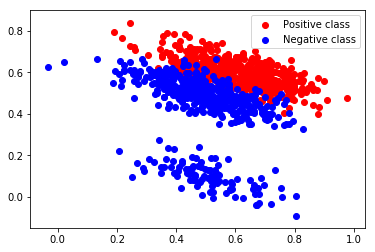

In [13]:
#display your data
pos=np.nonzero(train_labels==1)[1]
neg = np.nonzero(train_labels!=1)[1]
plt.scatter(train_features[0,pos],train_features[1,pos],c="r",label="Positive class")
plt.scatter(train_features[0,neg],train_features[1,neg],c="b",label="Negative class")
plt.legend(loc=1)
plt.show()

## Linear Regression (Done for you)

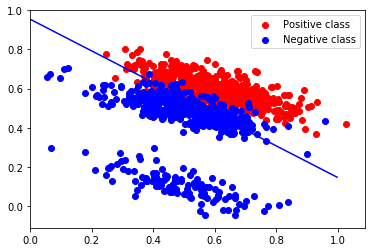

In [14]:
## Train a linear classifier

## in slide 31, Lecture 1, X was (Ndata x Ndimensions), Y was (Ndata x 1)
## Now the size of train_features is Ndimensions x Ndata and of Y is 1 x Ndata
## so we transpose train_features and train_data to get X and Y respectively
X = train_features.T;
Y = train_labels.T;

##  form X^T X
XX = np.dot(X.T, X)

##  form X^T Y
YX = np.dot(X.T,Y);

##  solve   w  = (X^T X)^{-1}  (X^T Y)
w = np.dot(np.linalg.inv(XX),YX);


## visualize classifier
## step 1: get its value over a regular grid of positions
loc_x=np.arange(0,1.01,.01)
loc_y=np.arange(0,1.01,.01)
function_values,grid_x,grid_y=evaluate_linear_discriminant_on_grid(w,loc_x,loc_y)

## step 2: plot the set of positions where its value equals .5
contour_values=[.5,];
contPlt = plt.contour(grid_x, grid_y, function_values, contour_values, cmap=plt.cm.winter)
#plt.clabel(contPlt)

## step 3: superimpose the points of the test set
pos=np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

plt.scatter(test_features[0,pos],test_features[1,pos],c="r",label="Positive class")
plt.scatter(test_features[0,neg],test_features[1,neg],c="b",label="Negative class")
plt.legend(loc=1)
plt.show()

## Logistic regression

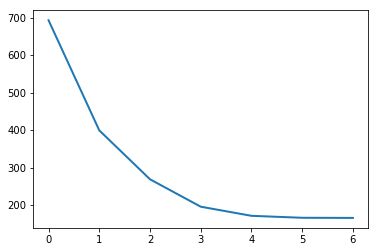

In [15]:
w_logistic = np.array([[0], [0], [0]]) #initialize w 
score_list = []
update_delta = 0.01

while True: #continue until converge criterion is met
    poly = X @ w_logistic
    g = 1 / (1 + np.exp(-poly))
    loss = - ((np.transpose(Y) @ np.log(g)) + (1 - np.transpose(Y)) @ np.log(1 - g))
    score_list.append(loss[0][0])
    
    gradient = np.transpose(g - Y) @ X
    r = g * (1 - g)
    r_matrix = np.diagflat(r)
    hessian = np.transpose(X) @ r_matrix @ X
    
    delta = np.transpose(gradient @ inv(hessian))
    w_old = w_logistic
    w_logistic = w_old - delta

    if np.linalg.norm(w_logistic - w_old)  < update_delta * np.linalg.norm(w_logistic):
        break
    

plt.plot(np.array(score_list), linewidth=2.0)
plt.show()

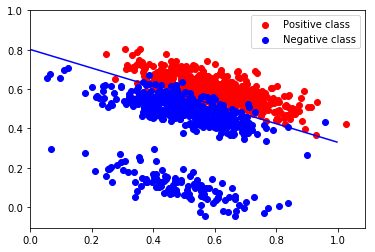

In [18]:
#########
# TO_DO #
#########

pos= np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

plt.scatter(test_features[0,pos],test_features[1,pos],c="r",label="Positive class")
plt.scatter(test_features[0,neg],test_features[1,neg],c="b",label="Negative class")

loc_x=np.arange(0,1.01,.01)
loc_y=np.arange(0,1.01,.01)

function_values_logistic, grid_x_logistic, grid_y_logistic = evaluate_linear_discriminant_on_grid(w_logistic,loc_x,loc_y)

contour_values=[.0,];
contPlt = plt.contour(grid_x_logistic, grid_y_logistic, function_values_logistic, 
                      contour_values, cmap=plt.cm.winter)

plt.legend(loc=1)
plt.show()

#### Robustness of logistic regression versus linear regression for categorical data

When we classify points, our goals is to misclassify as few points as possible. However, when we do regression, the goal is expressed in terms of minimizing the distance between a predicted value and the actual value, using loss functions such as mean squared error.

The problem with using linear regression for classification problems lies in the fact that the classifier uses an unbounded loss function, which would lead to penalizing the classifier even if it predicts with high confidence the correct value for a certain instance.

More specifically, let's say that our classes are 0 and 1, and we predict 0 if the outcome is < 0.5, else we predict 1. Now, if we predict for a positive training instance (i.e. y=1), a very large positive value (say, y_pred=1000), even though this in theory means that we correctly classify the instance with high confidence, the mean squared error loss used for linear regression would impose high penalty dues to the distance between 1 and 1000.

On the other hand, in logistic regression we employ the sigmoid function to express the output, which is closed in the interval [-1, 1]. This means that the higher the linear function's output is for a given x, the more confident we are about our prediction of the positive class and the closer we are to 1.


This goes to prove why regression is unsuitable for classification  and why logistic regression is more robust and suitable for this.